## Import libraries

In [49]:
# current draft of data
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining the Data

In [3]:
link = "https://steam250.com/20"

title = []
price = []
score = []
num_votes = []
genre = []
year = []

def func(element):
  return element.string

for i in range(13, 23):
    url = link + str(i)
    page = requests.get(url)
    # print(page.status_code)
    soup = bs(page.content, "html.parser")

    title_i = list(map(func, soup.select("div.appline > span.title > a"))) # v.col1.main.ranking div#\31 div.appline span.title a
    price_i = list(map(func, soup.select("div.appline > span.price, a.free")))
    score_i = list(map(func, soup.select("div:nth-child(3) > span.score")))
    num_votes_i = list(map(func, soup.select("div:nth-child(3) > span.votes")))
    genre_i = list(map(func, soup.select("div.appline > a.genre")))

    for j in range(0, 150):
        title.append(title_i[j])
        price.append(price_i[j])
        score.append(score_i[j])
        num_votes.append(num_votes_i[j])
        genre.append(genre_i[j])
        year.append("20" + str(i))

In [4]:
data = {
    "Year of Release" : year, 
    "Game Title" : title,
    "Game Price" : price,
    "Score" : score,
    "Votes" : num_votes,
    "Genre" : genre,
}

df = pd.DataFrame(data=data)

In [5]:
df.head(10)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,$14.99,8.61,"221,116 votes",Adventure
1,2013,Don't Starve,$9.99,8.60,"101,024 votes",Survival
2,2013,"Papers, Please",$9.99,8.58,"59,242 votes",Political
3,2013,The Wolf Among Us,$14.99,8.58,"30,144 votes",Adventure
4,2013,Outlast,$19.99,8.57,"100,083 votes",Horror
5,2013,Age of Empires II (2013),$19.99,8.51,"97,058 votes",Strategy
6,2013,Gunpoint,$9.99,8.48,"12,329 votes",Stealth
7,2013,The Walking Dead: Season Two,$14.99,8.45,"27,208 votes",Zombies
8,2013,Game Dev Tycoon,$9.99,8.43,"40,097 votes",Management
9,2013,BioShock Infinite,$7.49,8.39,"131,346 votes",FPS


## Cleaning the Data

In [6]:
df.shape

(1500, 6)

In [7]:
df.dtypes

Year of Release    object
Game Title         object
Game Price         object
Score              object
Votes              object
Genre              object
dtype: object

In [8]:
# thank goodness
df.isnull().sum()

Year of Release    0
Game Title         0
Game Price         0
Score              0
Votes              0
Genre              0
dtype: int64

In [9]:
df[["Votes", "year"]] = df["Votes"].str.split(' ', expand=True)

In [10]:
#df.head(2)

In [11]:
df.drop(['year'], axis=1, inplace=True)

In [12]:
df.head(2)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,$14.99,8.61,"221,116",Adventure
1,2013,Don't Starve,$9.99,8.60,"101,024",Survival


In [13]:
df["Votes"] = df["Votes"].str.replace(',', '')
df["Game Price"] = df["Game Price"].str.replace('$', '')

C:\Users\mitch\AppData\Local\Temp\ipykernel_27448\1601834454.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Game Price"] = df["Game Price"].str.replace('$', '')


In [14]:
# not sure what that warning above means but it works

df.head(2)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,14.99,8.61,221116,Adventure
1,2013,Don't Starve,9.99,8.60,101024,Survival


In [15]:
# df.dtypes


In [16]:
df["Score"] = df["Score"].astype('float64')
df["Votes"] = df["Votes"].astype('int64')

In [17]:
# df["Game Price"] = df["Game Price"].astype('float64')
for i in range(1500):
    if df["Game Price"][i] == "free":
        df["Game Price"][i] = "0.00"
    elif df["Game Price"][i] == "Free":
        df["Game Price"][i] = "0.00"

C:\Users\mitch\AppData\Local\Temp\ipykernel_27448\2853826804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Game Price"][i] = "0.00"


In [18]:
df["Game Price"] = df["Game Price"].astype('float64')

In [19]:
df["Game Title"] = df["Game Title"].astype('string')
df["Genre"] = df["Genre"].astype('string')
df["Year of Release"] = df["Year of Release"].astype('int64')

In [20]:
df.dtypes

Year of Release      int64
Game Title          string
Game Price         float64
Score              float64
Votes                int64
Genre               string
dtype: object

In [21]:
df.head()

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,14.99,8.61,221116,Adventure
1,2013,Don't Starve,9.99,8.60,101024,Survival
2,2013,"Papers, Please",9.99,8.58,59242,Political
3,2013,The Wolf Among Us,14.99,8.58,30144,Adventure
4,2013,Outlast,19.99,8.57,100083,Horror


In [22]:
# there are way too many different genres to analyze
# must condense
df.nunique()

Year of Release      10
Game Title         1500
Game Price           74
Score               128
Votes              1434
Genre               206
dtype: int64

In [46]:
# find most repeated genres
item_counts = df["Genre"].value_counts()

print(type(item_counts), '\n')
print(item_counts[:20])


<class 'pandas.core.series.Series'> 

Adventure               112
Action                   96
Visual Novel             76
Casual                   75
Puzzle                   75
RPG                      61
Horror                   52
Dating Sim               44
Strategy                 40
Simulation               39
Anime                    36
Story Rich               33
FPS                      28
Action Roguelike         24
Platformer               20
Psychological Horror     18
Bullet Hell              18
Pixel Graphics           18
Fighting                 17
Funny                    17
Name: Genre, dtype: Int64


In [24]:
# my pick for top 10 is:
    # action/adventure, puzzle, rpg, casual, artistic, platformer, horror, strategy, simulation, fps
    # however, due to time constrants, I'm going to leave them as is and hope nothing bad happens
    # I will only change the potentially iffy ones

for i in range(1500):
    if (df["Genre"][i] in {"Sexual Content"}):
        df["Genre"][i] = "Dating Sim"
    if (df["Genre"][i] in {"Hentai"}):
        df["Genre"][i] = "Anime"
    if (df["Genre"][i] in {"LGBTQ+"}):
        df["Genre"][i] = "Story Rich"   

In [26]:
df.to_csv("games_dataset_cleaned.csv")

## Data Visualizations

### What to make: 
* bar chart of (top 10-20) genres and avg votes / avg score, does one genre do better than others?



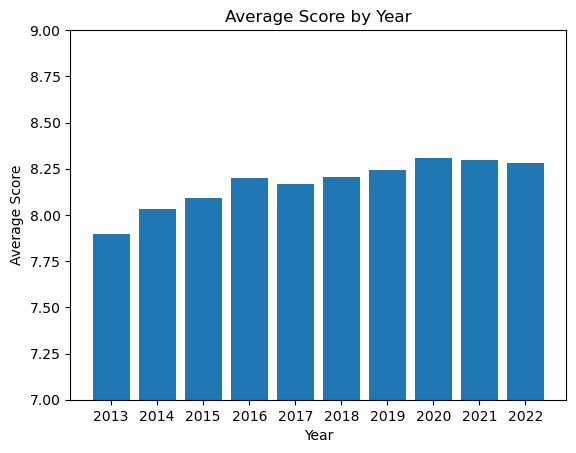

In [38]:
# Group data by year and calculate average votes
grouped_data = df.groupby('Year of Release')['Score'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Set chart title and axis labels
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.xticks(grouped_data.index)
plt.ylim(7, 9)

# Show the chart
plt.show()

# include Whiskers too for cool effect

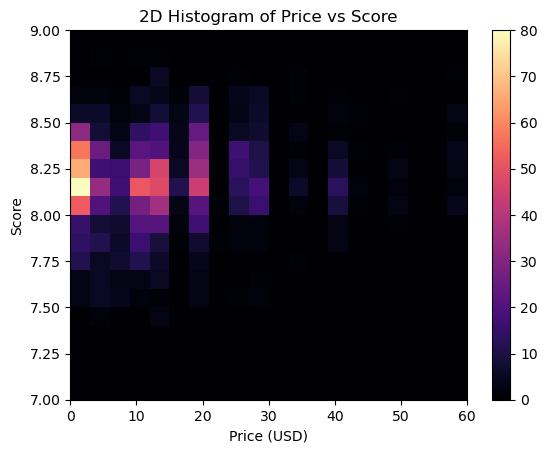

In [103]:
# Create a scatter plot with a linear regression line
plt.hist2d(df["Game Price"], df["Score"], bins=20, cmap="magma", range=[[0, 60], [7, 9]])

# Set chart title and axis labels
plt.title('2D Histogram of Price vs Score')
plt.xlabel('Price (USD)')
plt.ylabel('Score')

plt.colorbar()

# Show the chart
plt.show()

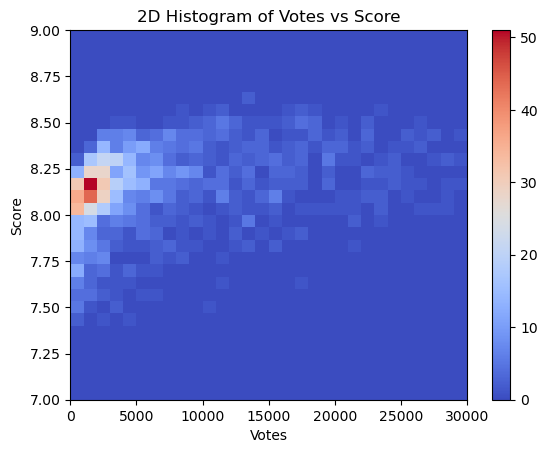

In [101]:
# Create a scatter plot with a linear regression line
plt.hist2d(df["Votes"], df["Score"], bins=30, cmap="coolwarm", range=[[0, 30000], [7, 9]])

# Set chart title and axis labels
plt.title('2D Histogram of Votes vs Score')
plt.xlabel('Votes')
plt.ylabel('Score')


plt.colorbar()

# Show the chart
plt.show()

In [ ]:
# Genre Stuff not working

# dct = dict()

# # for i in range(20):

# for i in range(1500):
#     if df["Genre"][i] in {"Adventure", "Action", "Visual Novel", "Casual", "Puzzle", "RPG", "Horror", "Dating Sim", "Strategy", "Simulation", "Anime", "Story Rich", "FPS", "Action Roguelike", "Platformer", "Psychological Horror", "Bullet Hell", "Pixel Graphics", "Fighting", "Funny"}:
#         dct[df["Genre"][i]] = df["Score"][i]

# # Group data by year and calculate average votes
# gdata2 = df.groupby('Genre')['Score'].mean()

# # Create a bar chart
# plt.hist(dct.values, bins=10)

# # Set chart title and axis labels
# plt.title('Average Score by Top 10 Genres')
# plt.xlabel('Genres')
# plt.ylabel('Average Score')

# # Show the chart
# plt.show()